## Problem 0: Implementation
Implement the `derivatives` function in `chap3/mav_dynamics.py`using the quaternion form of the dynamics described in equations *(B.1)* through *(B.6)* of *Appendix B* in the book. Note that the dynamics utilized are from the Aerosonde UAV from Table E.2. The first column of these parameters should provide / aid your intuition about what is occuring.

Below are some useful code snippets and hints:
* *st = DynamicState(state):* Extract the numpy matrix into a struct for easy access of states. Note that the *DynamicsState* struct is defined on line 46.
* *fm = ForceMoments(forces_moments):* Extract forces and moments into a struct for easy access. Note that the *ForceMoments* struct is defined on line 124.
* The momemtum terms are defined in *mav_sim.parameters.aerosonde_parameters.py* and are imported as MAV (i.e., to get $\Gamma_1$, call *MAV.gamma1*)
* Equation *(3.14)* can be used instead of *(B.1)* by converting the quaternion to a rotation matrix using *Quaternion2Rotation(state[IND.QUAT])*
* The velocity values can be extracted as a vector as *state[IND.VEL]*

## Problem 1: No Inputs, Zero Initial Conditions
For this problem, you will test the dynamics function with no input forces and torques, and all initial velocities set to zero. Set the initial conditions such that the vehicle starts at zero north and east position, and an altitude of 5 meters.  Set the initial attitude (yaw) to $\frac{\pi}{4}$ and zero roll and pitch.  Set all velocities to zero.

### Question: What behavior do you expect (try to be explicit in terms of what different states will do)?
**Answer:** The aircraft states will all remain the same except for the altitude. The altitude will decrease because there is no lift on the wings. 

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** The aircraft did not move because the were no forces on the aircraft. we have not modled gravity so the aircraft did not decrease in altitude as expected.

In [1]:
# Note that this cell can be run separately to initialize for other cell blocks
from mav_sim.chap3.mav_dynamics import DynamicState, ForceMoments
from mav_sim.chap3.run_sim import run_sim
from mav_sim.message_types.msg_sim_params import MsgSimParams
from mav_sim.tools.display_figures import display_data_view, display_mav_view
from mav_sim.chap2.mav_viewer import MavViewer
from mav_sim.chap3.data_viewer import DataViewer
import numpy as np

# The viewers need to be initialized once due to restart issues with qtgraph
if 'mav_view' not in globals():
    print("Initializing mav_view")
    global mav_view
    mav_view = MavViewer()  # initialize the mav viewer
if 'data_view' not in globals():
    print("Initializing data_view")
    global data_view
    data_view = DataViewer()  # initialize view of data plots

def run_sim_and_display(sim_params, state, fm):
    global mav_view
    global data_view
    data_view.reset(sim_params.start_time)
    (mav_view, data_view) = run_sim(sim_params, state, fm, mav_view, data_view)
    display_data_view(data_view)
    display_mav_view(mav_view)

Initializing mav_view
Initializing data_view


Press Command-Q to exit...


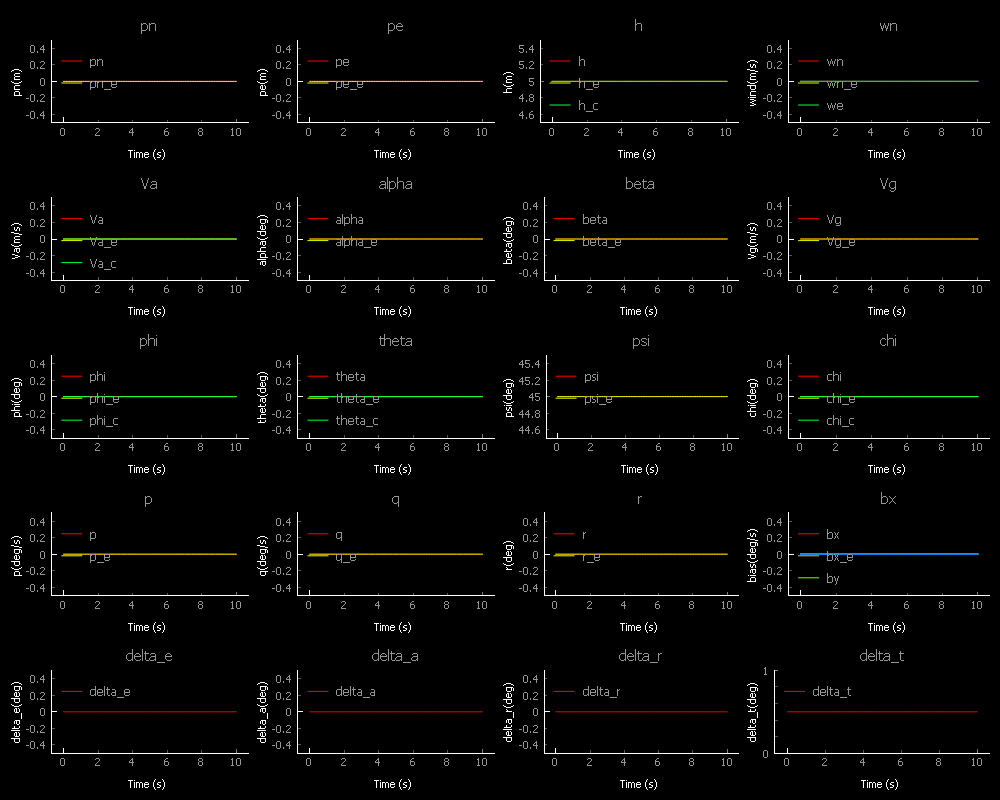

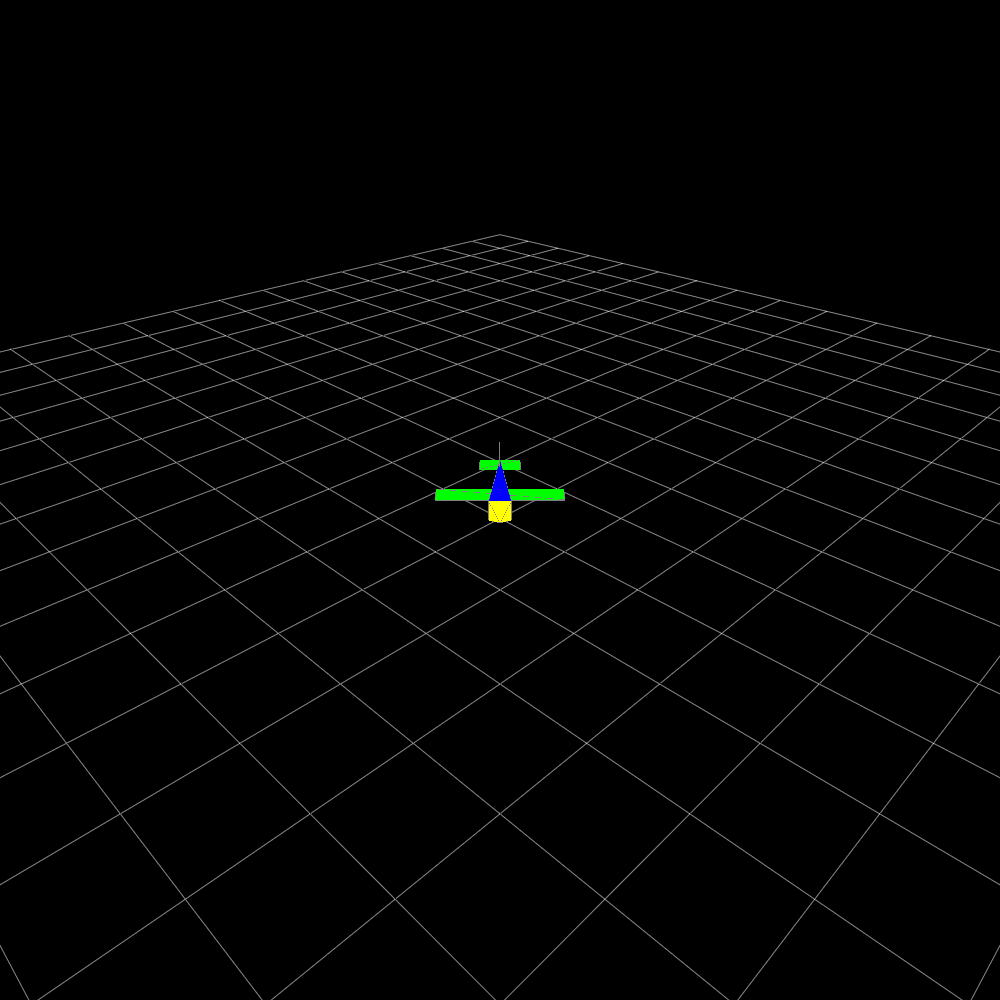

In [2]:
# Initialize the simulation parameters
sim_params = MsgSimParams(end_time=20.) # Sim ending in 10 seconds
state = DynamicState(state=np.zeros([13,1])) # State initialized to zeros
state.down = -5.
state.set_attitude_euler(0., 0., np.pi/4)
fm = ForceMoments(force_moment=np.zeros([6,1])) # Set all forces equal to zero

# Run the simulation and display the data
run_sim_and_display(sim_params, state, fm)

## Problem 2: No Inputs, Non-Zero Initial Conditions
For this problem, you will test the dynamics function with no input forces and torques. Set the initial velocities such that the UAV is flying straight at $1 \frac{m}{s}$. Set the initial conditions such that the vehicle starts at zero north, zero east, and an altitude of 5 meters.  Set the initial attitude (yaw) to $\frac{\pi}{4}$ with zero roll and pitch.  

### Question: What behavior do you expect (try to be explicit in terms of what different states will do)?
**Answer:** The aircraft will fly straight and level with a 45 degree heading because the starting yaw was set to 45 degrees

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** The aircraft responded as expected. 

Need to choose parameters
Press Command-Q to exit...


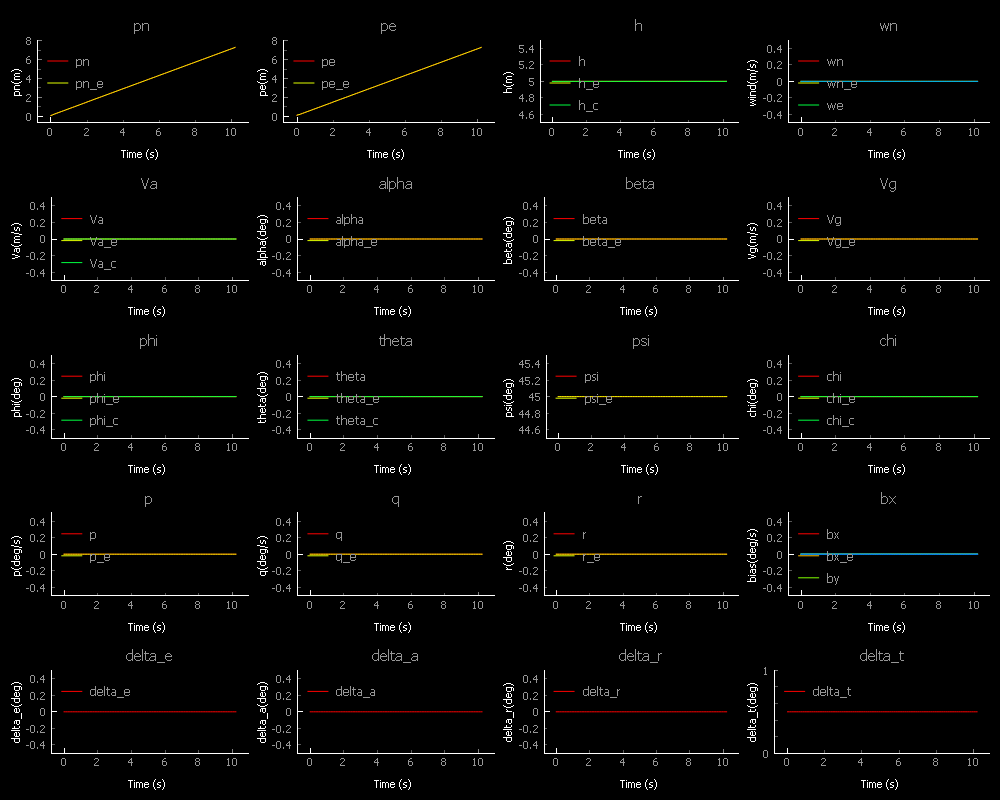

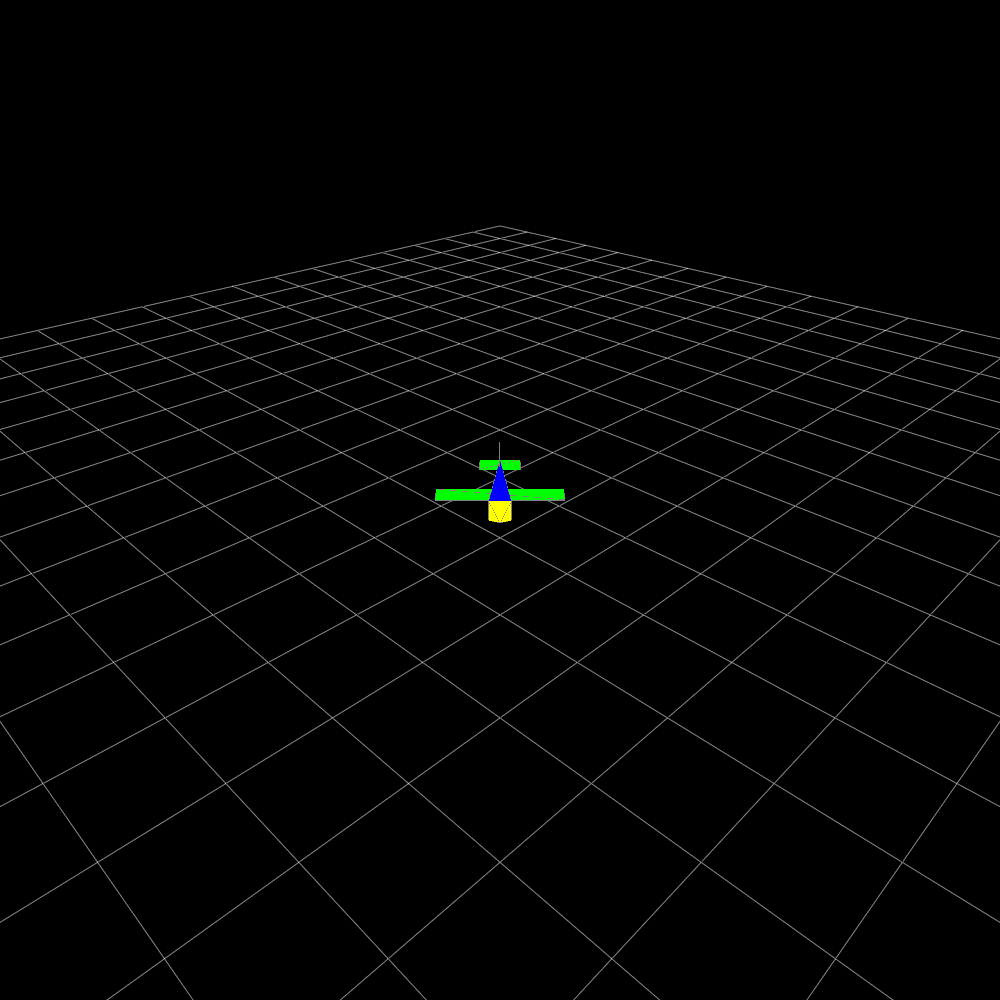

In [3]:
# Initialize the simulation parameters
sim_params = MsgSimParams(end_time=20.) # Sim ending in 10 seconds
state = DynamicState(state=np.zeros([13,1])) # State initialized to zeros
state.set_attitude_euler(0., 0., np.pi/4.)
fm = ForceMoments(force_moment=np.zeros([6,1])) # Set all forces equal to zero
print('Need to choose parameters')
state.u=1.
state.down=-5.

# Run the simulation and display the data
run_sim_and_display(sim_params, state, fm)

## Problem 3: No Inputs, Non-Zero Initial Rotational Velocities
For this problem, you will test the dynamics function with no input forces and torques, but with initial rotational velocities. Set the initial velocities such that the UAV is at rest. Set the initial conditions such that the vehicle starts at zero north, zero east, and an altitude of 5 meters.  Set the initial attitude (yaw) to $\frac{\pi}{4}$ with zero roll and pitch. Set the initial roll rate to $0.5$ 0.5 rad/s.

### Question: What behavior do you expect (try to be explicit in terms of what different states will do)?
**Answer:** The aircraft will have a 45 degree heading. And will roll about the north axis at a constant rate of .5 rad/s. 

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** The aircraft did not roll exactly about the north axis. This is due to the J matrix and the mass moment of inertia is not symetric about the north axis.

Need to choose parameters
Press Command-Q to exit...


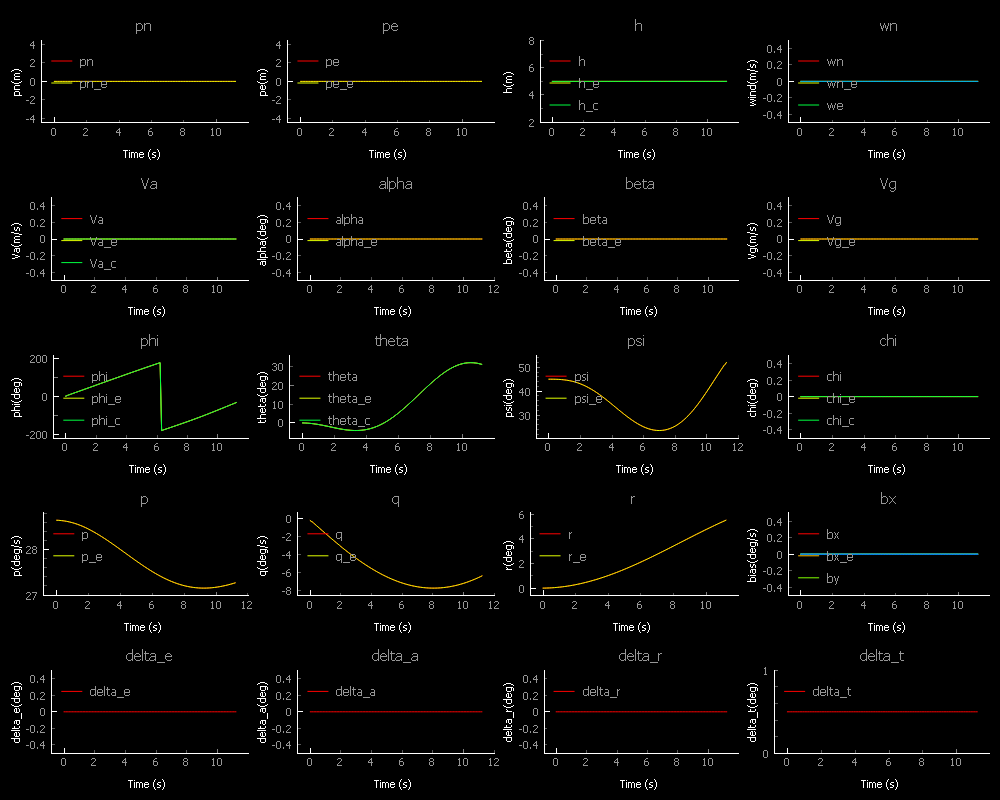

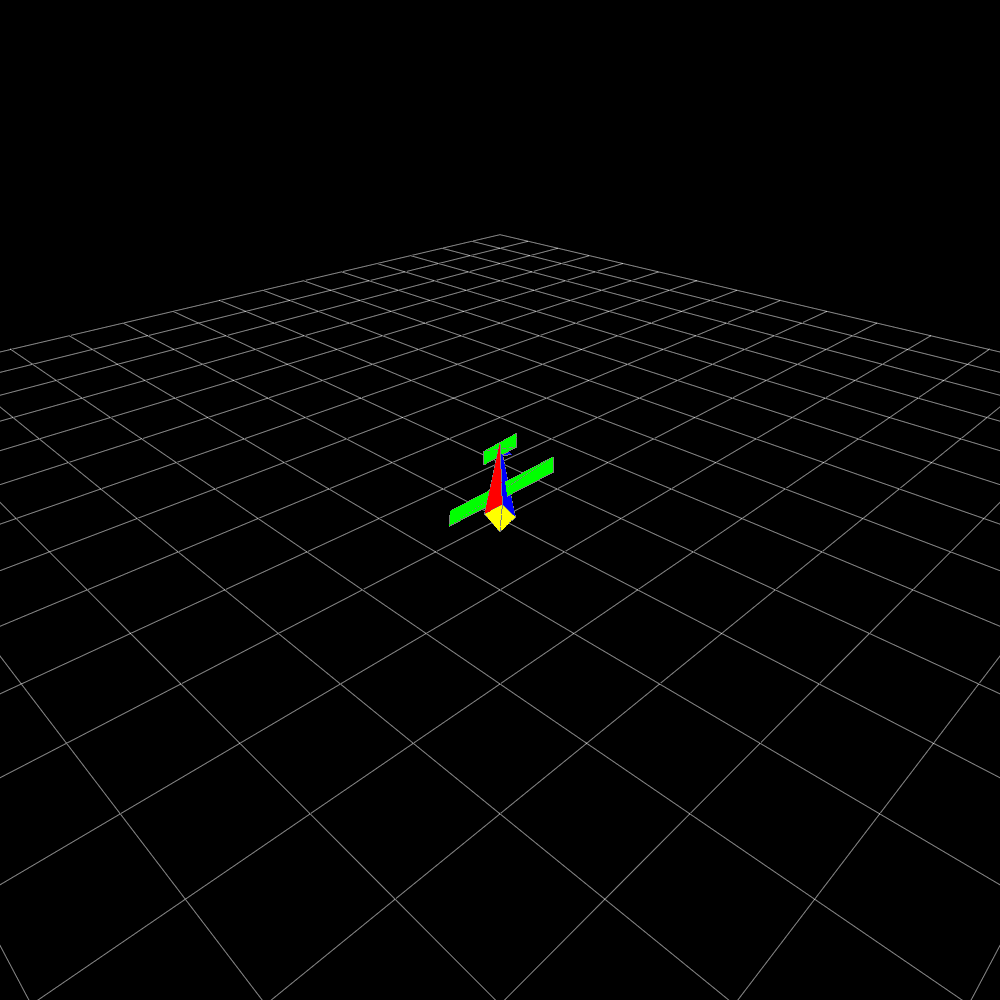

In [9]:
# Initialize the simulation parameters
sim_params = MsgSimParams(end_time=20.) # Sim ending in 10 seconds
state = DynamicState(state=np.zeros([13,1])) # State initialized to zeros
state.set_attitude_euler(0., 0., np.pi/4.)
fm = ForceMoments(force_moment=np.zeros([6,1])) # Set all forces equal to zero
print('Need to choose parameters')
state.down=-5.
state.p=.5

# Run the simulation and display the data
run_sim_and_display(sim_params, state, fm)

## Problem 4: Constant Force Inputs
For this problem, you will test the dynamics function with zero initial conditions and constant force inputs. Set the initial conditions such that the vehicle starts at zero north and east position, and an altitude of 5 meters.  Set the initial attitude (yaw) to $\frac{\pi}{4}$ and zero roll and pitch.  Set all velocities to zero. Define the input forces to $0.1 $ Newton in the direction of $i^b$ and $0.5$ Newton in an upwards direction.

### Question: What behavior do you expect (try to be explicit in terms of what different states will do)?
**Answer:** (Answer before completion)

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** (Answer after completion)

Need to choose parameters
Press Command-Q to exit...


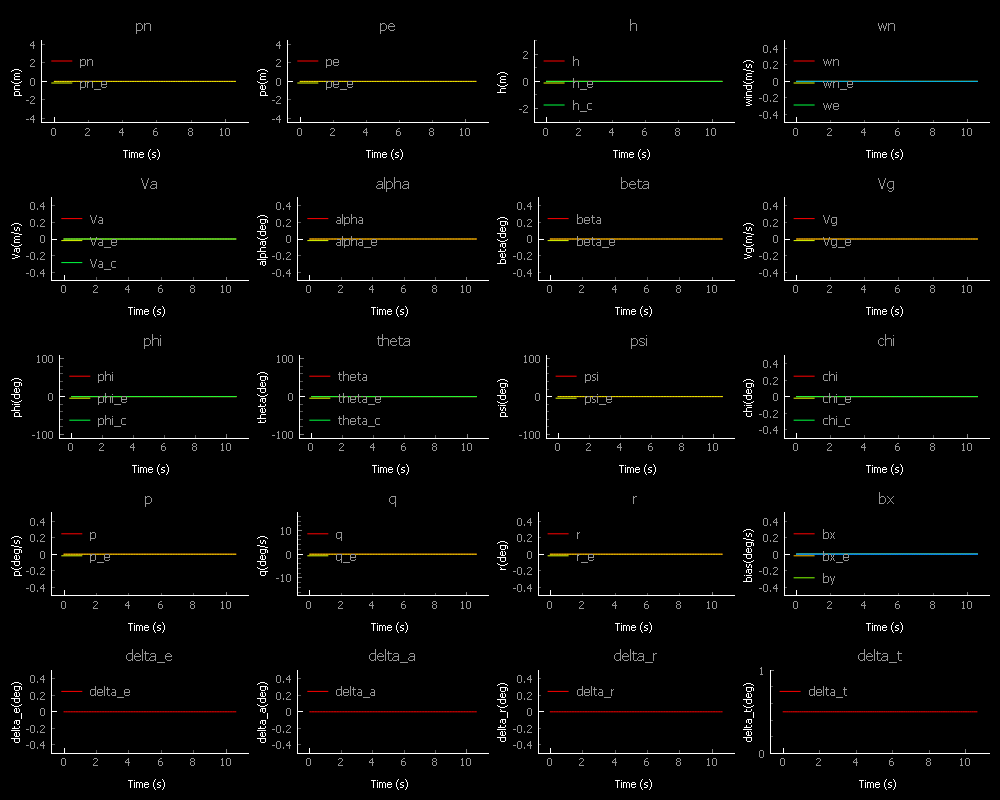

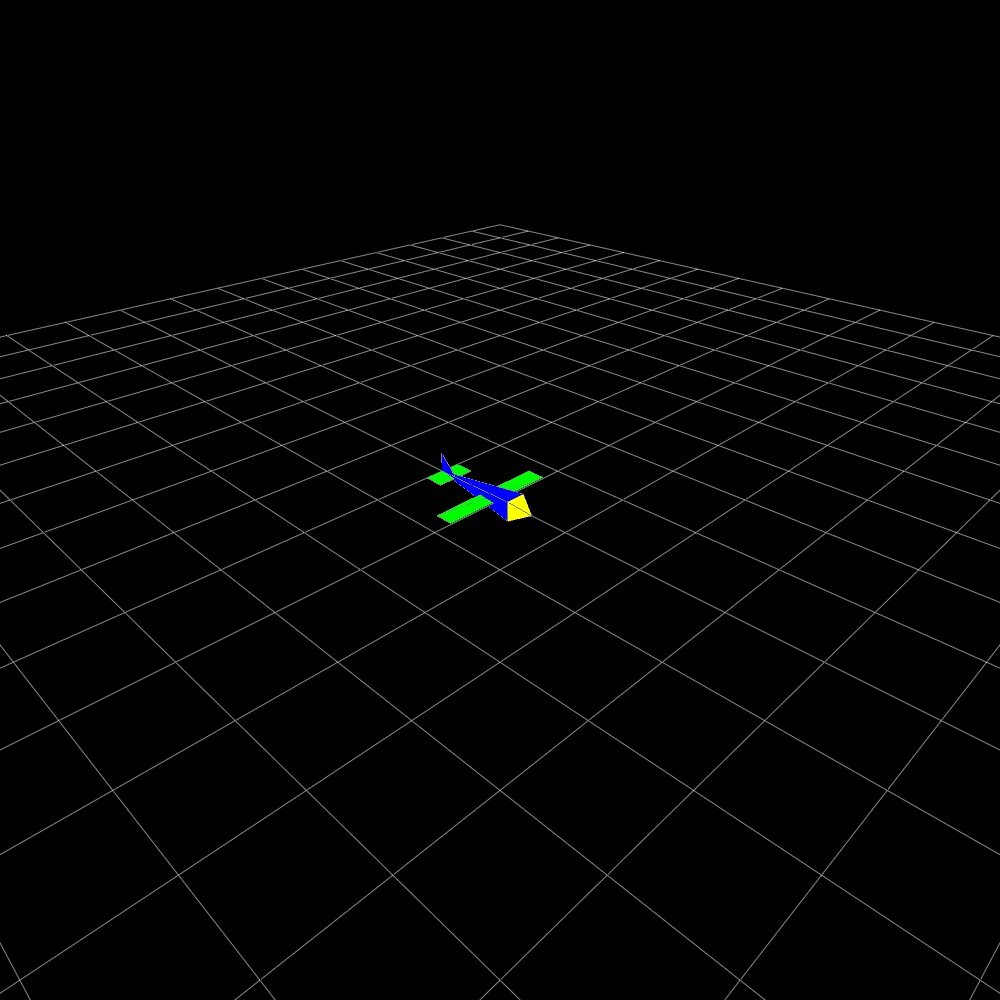

In [5]:
# Initialize the simulation parameters
sim_params = MsgSimParams(end_time=20.) # Sim ending in 10 seconds
state = DynamicState(state=np.zeros([13,1])) # State initialized to zeros
state.set_attitude_euler(0., 0., 0.)
fm = ForceMoments(force_moment=np.zeros([6,1])) # Set all forces equal to zero
print('Need to choose parameters')

# Run the simulation and display the data
run_sim_and_display(sim_params, state, fm)

## Problem 5: Constant Torque Inputs
For this problem, you will test the dynamics function with zero initial conditions and constant force inputs. Set the initial conditions such that the vehicle starts at zero north and east position, and an altitude of 5 meters.  Set the initial attitude (yaw) to $\frac{\pi}{4}$ and zero roll and pitch.  Set all velocities to zero. Define the torque about the $x$-axis as 0.1 with all other torques and forces zeroed out.

### Question: What behavior do you expect (try to be explicit in terms of what different states will do)?
**Answer:** (Answer before completion)

### Question: Was the behavior as expected? If not, what did you observe differently from what you thought you would? Why did this difference occur?
**Answer:** (Answer after completion)

Need to choose parameters
Press Command-Q to exit...


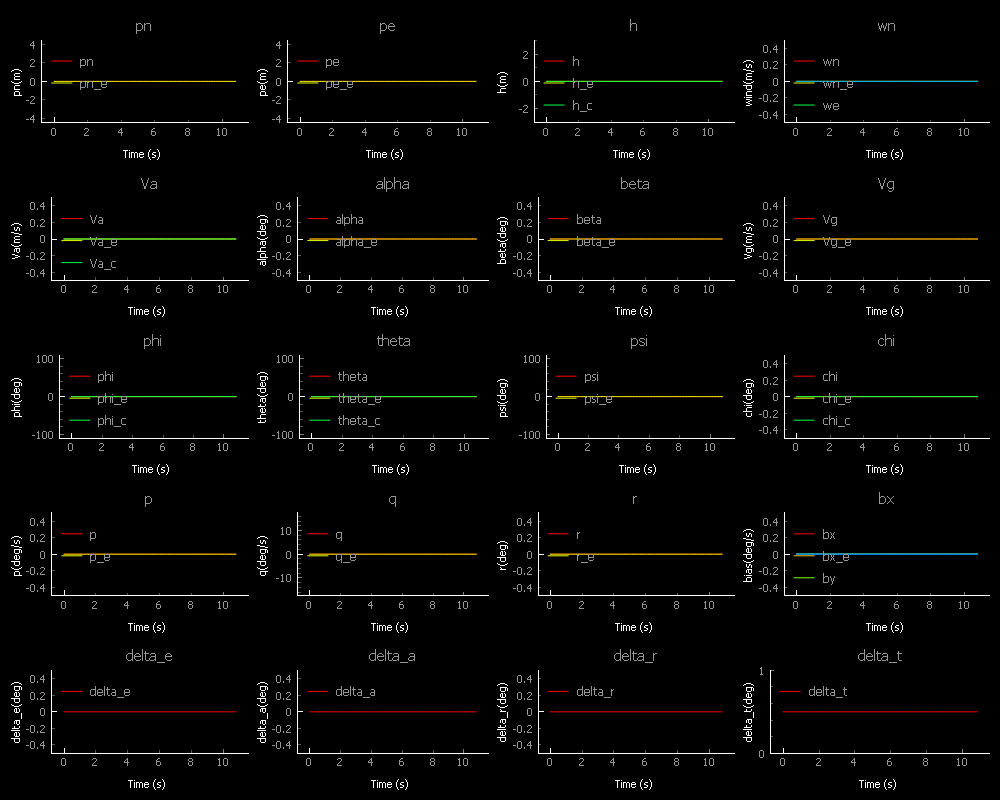

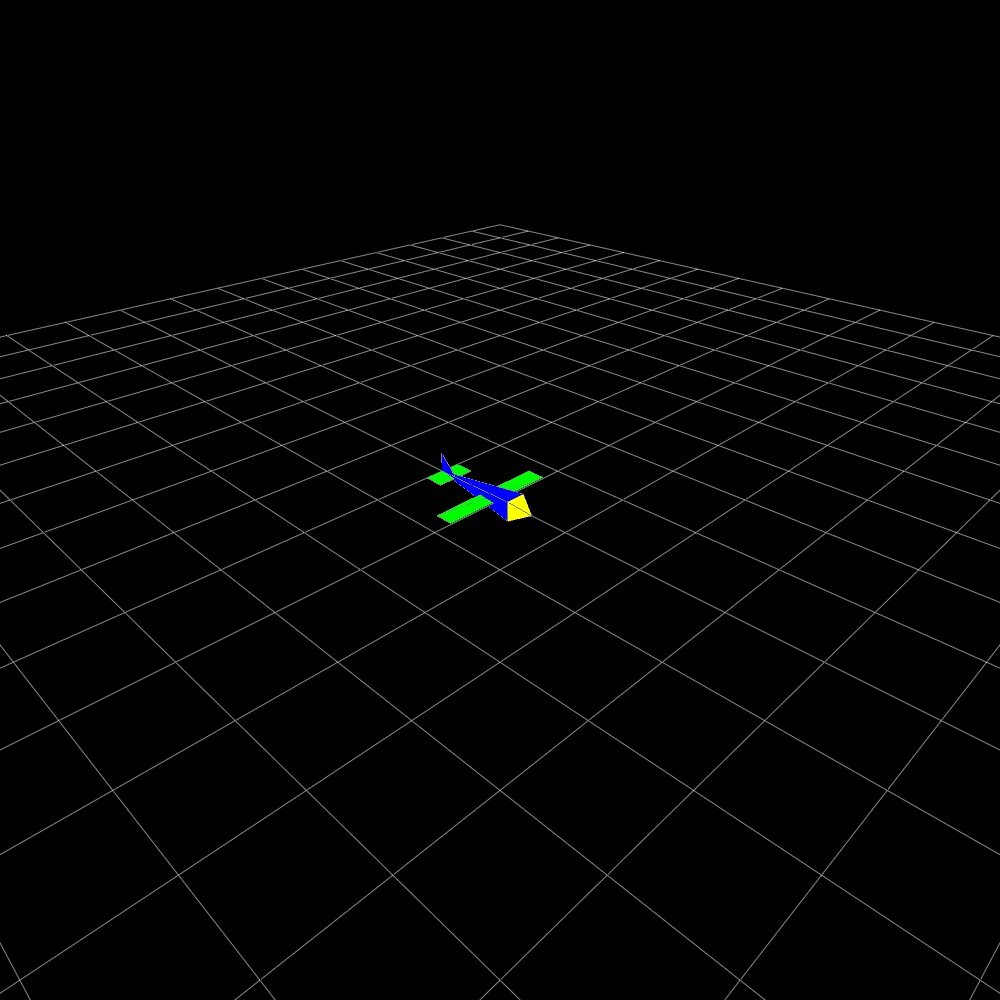

In [6]:
# Initialize the simulation parameters
sim_params = MsgSimParams(end_time=20.) # Sim ending in 10 seconds
state = DynamicState(state=np.zeros([13,1])) # State initialized to zeros
state.set_attitude_euler(0., 0., 0.)
fm = ForceMoments(force_moment=np.zeros([6,1])) # Set all forces equal to zero
print('Need to choose parameters')

# Run the simulation and display the data
run_sim_and_display(sim_params, state, fm)

## Static analysis
Run the static code analysis (you must have zero static code analysis errors to get credit). You may not modify the static code analysis configuration files.

### ISORT
Run Isort:
```
python -m isort mav_sim book_assignments
```

Terminal output (should be nothing):

### MyPy
Run MyPy
```
python -m mypy mav_sim/chap2/ mav_sim/chap3/ book_assignments
```

Terminal output (should indicate no error):
```
Success: no issues found in 21 source files
```

### Pylint
Run Pylint
```
python -m pylint --jobs 0 --rcfile .pylintrc mav_sim/chap2/ mav_sim/chap3/ book_assignments/
```

Terminal output (should indicate `10/10`)
```
Your code has been rated at 10.00/10 (previous run: 9.98/10, +0.02)
```

## Simple code checking
The following code does not need to change. It should just be used as a sanity check so that you know the code is implemented properly. The output should not have any lines reading `Failed test!`

In [7]:
from mav_sim.unit_tests.ch3_derivatives_test import DynamicsResults, run_tests
run_tests()


Starting derivatives_euler test
Passed test on derivatives_euler

Starting derivatives test
Passed test on derivatives
